#GOAL-
1. Create an random tall skinny matrix A (usually one or no solution).
2. Perform the economy SVD of the random matrix and show that any vector of **A** lies in the Column Space defined by Left Singular Matrix A. What is reason for this?
3. Take a random vector **'b'** and try to develop a linear model from the given data A. Display the key or unique fingerprint of vector b when represented in the eigen vectors of A.
4. Project the new vector **b** onto the basis vectors of left singular matrix from economy svd.
5 Calculate the error of the projection (model prediction) in terms of Euclidean distance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

[[0.81093659 0.63528319 0.73880557 0.15651528 0.16614982]
 [0.39564982 0.44131551 0.28485327 0.02043666 0.00572267]
 [0.55298028 0.93480402 0.43358997 0.10143545 0.04637133]
 [0.77668747 0.94967195 0.74255641 0.62619309 0.72302143]
 [0.47511815 0.88526841 0.93246595 0.4129889  0.29476418]
 [0.94345279 0.35448773 0.27552516 0.94130025 0.52385637]
 [0.46055257 0.81271288 0.50856716 0.89064219 0.21622333]
 [0.64341387 0.21267591 0.37915    0.74811325 0.38479764]
 [0.47360219 0.01451093 0.83566708 0.76062821 0.32368647]
 [0.52437571 0.42402251 0.65729112 0.98008211 0.75249756]]


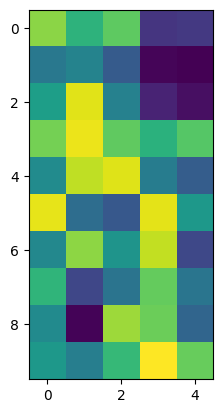

In [2]:
# Defining a random matrix:
A = np.random.rand(10,5) # Long skiny matrix
plt.imshow(A)
print(A)

In [3]:
# Let us print the number of Linearly Independent columns in the matrix A
rank = np.linalg.matrix_rank(A)
print(rank)

5


In [4]:
# Let us do a Svd decomposition of the matrix A:
U, S, VT = np.linalg.svd(A, full_matrices = True)

print(f'U matrix is:\n {U}')
print(f'Shape of the U matrix is: {U.shape}')
print()
print(f'S matrix is:\n {S}')
print(f'Shape of the S matrix is: {S.shape}')
print()
print(f'VT matrix is:\n {VT}')
print(f'Shape of the VT matrix is: {VT.shape}')

U matrix is:
 [[-2.95805900e-01  3.33515671e-01 -1.19138782e-01 -5.69960803e-01
  -8.32650955e-03 -2.28100706e-01  4.47911719e-01 -2.04008152e-01
  -4.05008645e-01  6.19782228e-02]
 [-1.37917893e-01  2.68452319e-01  8.40128374e-02 -2.06011976e-01
  -9.31147908e-02  6.82296786e-01  2.76786023e-01  4.62610900e-01
   2.92347029e-01  9.55380270e-02]
 [-2.46234037e-01  5.01182684e-01  2.32281095e-01  1.50454563e-02
  -1.41047927e-01 -3.75483802e-01 -3.00474439e-01 -7.77848566e-02
   4.82389991e-01  3.79586308e-01]
 [-4.29863568e-01  1.25426006e-01  1.04194807e-01  1.46510645e-01
   6.11542935e-01 -7.90107037e-02  9.21382122e-02  7.58730185e-03
   2.22665770e-01 -5.73418859e-01]
 [-3.48247212e-01  3.21729767e-01 -4.00055368e-01  2.08337066e-01
  -4.00682089e-03  2.96160069e-01 -5.40628842e-01  3.42868299e-02
  -4.36419523e-01  1.10106192e-02]
 [-3.47772324e-01 -3.54899519e-01  5.50248229e-01 -3.01189803e-01
  -7.28845610e-02  3.23188686e-01 -2.92870125e-01 -3.96944565e-01
  -8.06926664e-02  

Observe that U consists of 10 mutually orthonormal columns in R10, i.e., any new vector in R10 can be expressed a s a linear combination of the columns in U. U spans the entire R10 dimensional space.  

In [5]:
# The full matrix computation is expensive so we will instead opt for an economy SVD.
# Computing the economy SVD. Since the rank of matrix A = 5, we will get U as (all rows, :rank)
(U_hat, S_hat, VT_hat) = np.linalg.svd(A, full_matrices = False)
print(f'U_hat matrix is:\n {U_hat}')
print(f'Shape of the U_hat matrix is: {U_hat.shape}')
print()
print(f'S_hat matrix is:\n {S_hat}')
print(f'Shape of the S_hat matrix is: {S_hat.shape}')
print()
print(f'VT_hat matrix is:\n {VT_hat}')
print(f'Shape of the VT_hat matrix is: {VT_hat.shape}')

U_hat matrix is:
 [[-0.2958059   0.33351567 -0.11913878 -0.5699608  -0.00832651]
 [-0.13791789  0.26845232  0.08401284 -0.20601198 -0.09311479]
 [-0.24623404  0.50118268  0.23228109  0.01504546 -0.14104793]
 [-0.42986357  0.12542601  0.10419481  0.14651064  0.61154294]
 [-0.34824721  0.32172977 -0.40005537  0.20833707 -0.00400682]
 [-0.34777232 -0.35489952  0.55024823 -0.3011898  -0.07288456]
 [-0.33948713  0.00616214  0.1560204   0.53633926 -0.61374767]
 [-0.2718946  -0.29204172  0.13986514 -0.20241144 -0.12170775]
 [-0.27921667 -0.33118187 -0.62571488 -0.25627064 -0.27412185]
 [-0.37242689 -0.35399634 -0.12528201  0.28738049  0.35413421]]
Shape of the U_hat matrix is: (10, 5)

S_hat matrix is:
 [3.93371548 1.28209972 0.68055056 0.59680809 0.44333704]
Shape of the S_hat matrix is: (5,)

VT_hat matrix is:
 [[-0.48729153 -0.46126089 -0.4723795  -0.48239638 -0.30649093]
 [ 0.03254161  0.67465075  0.17042711 -0.64423599 -0.31575623]
 [ 0.403895    0.31257191 -0.85268306  0.10209107  0.040

Observe that now a new vetor can be in a R10 dimensional space but U_hat that can be taken as the new coordinate basis only spans R5. Thus it is possible that a new vector b may lie outside the column span of A. In such a case we need to solve fir the projection of b onto the vectors of U. These vectors of U are the eigen vectors of UUT.

**Instead of using the vectors in A, we will use the mutually orthogonal vectors of A that are present in U_hat**

In [6]:
# Let us consider the first column of A and check if it lies in the column span of U: Normal form: -- x = U'b (here b = A(first column))
b1 = A[:,0]
x = np.matmul(np.transpose(U_hat), b1)
print(f'The parameters for the model are: {x}')

The parameters for the model are: [-1.91686624  0.04172159  0.27487097 -0.46066838 -0.02237582]


In [7]:
# Let us project this b1 onto the C(U): Model prediction for given vectors
prediction = np.matmul(U_hat, x)
print(f'The closest vector to b in terms of eigen vector basis of AAT are (b projection on C(U): {prediction}')
e_vec = (b1-prediction)
err_mag = np.matmul(np.transpose(e_vec), e_vec)
print(f' The magnitude of error is: {err_mag}')

The closest vector to b in terms of eigen vector basis of AAT are (b projection on C(U): [0.81093659 0.39564982 0.55298028 0.77668747 0.47511815 0.94345279
 0.46055257 0.64341387 0.47360219 0.52437571]
 The magnitude of error is: 3.143117669239969e-31


Result: One observation is **any vector in the column space of A also lies in the column space of Vectors of U, which is an obvious result**

# Vector outside the column span of A or U_hat.
**Example of a face that does not lie in the column span of face directory or the eigen face vector span**

1. We will represent a new face in terms of the eigenvectors of the U_hat matrix.
2. Each face will be projected onto the eigen vectors of U_hat matrix.

In [8]:
b = np.random.rand(10,1)
print(b)

[[0.177074  ]
 [0.85031861]
 [0.81895997]
 [0.50374694]
 [0.07000645]
 [0.21798251]
 [0.15475324]
 [0.46727179]
 [0.68564575]
 [0.16451801]]


In [24]:
# Representing the new vector b
x_dash = np.matmul(np.transpose(U_hat), b)
# x_dash gives the linear combination of the eigen vectors in U that form the projection of b onto C(U)
print(f'The parameters for the model are:\n {x_dash}')

The parameters for the model are:
 [[-1.12033986]
 [ 0.2852983 ]
 [ 0.02486586]
 [-0.38105684]
 [-0.1858085 ]]


Text(0, 0.5, 'Significance or Slope')

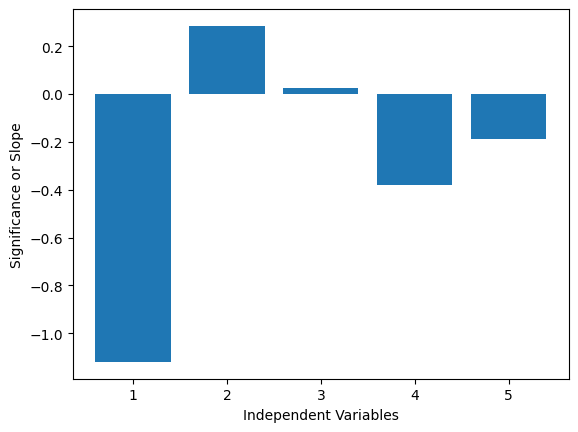

In [29]:
# How much of each of the eigen vector is required to form the closest b which is the projection of b on the eig vectors of U_hat
# Importance of the varaiables on the Concrete Compressive Strength:
instances = list(np.arange(1, len(x_dash)+1))
values = x_dash
values = values.flatten().tolist()
plt.bar(instances, values)
plt.xlabel('Independent Variables')
plt.ylabel('Significance or Slope')

In [30]:
# Projection of b onto the C(U) or onto the new coordinates formed from eigen vectors of U
Projection = np.matmul(U_hat, x_dash)
print(f'The closest vector (face) to the face b in the eigen vector bases is:\n {Projection}')

The closest vector (face) to the face b in the eigen vector bases is:
 [[0.6423267 ]
 [0.32899675]
 [0.44510297]
 [0.35050925]
 [0.3933527 ]
 [0.43036637]
 [0.29564239]
 [0.32451782]
 [0.35136085]
 [0.13782545]]
